### Project 2021 Neural Networks
##### Koutsourelakis Charilaos TP4591

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl
import seaborn as sns

from sklearn import datasets
from pandas import *

# Step 1

## Visualize the samples using a scatter plot (use the pandas and/or seaborn packages methods)


In [2]:
df = pd.read_csv("glass.csv")

#df.head()

df.describe()
#The datasets consists of 214 columns (Instanses) and 10 lines (Attributes).

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


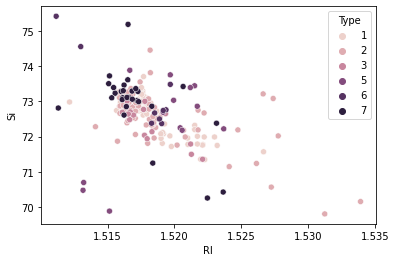

In [3]:
#Used seaborn scatterplot

#Used hue as a grouping variable that will produce points with different colors for better results

sns.scatterplot(data=df, x="RI", y="Si", hue="Type")
plt.show();



## Step 2

<AxesSubplot:xlabel='RI'>

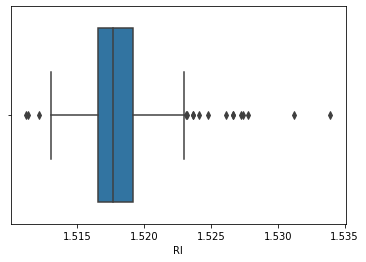

In [4]:
df = pd.read_csv("glass.csv")
sns.boxplot(x=df['RI'])

#  Used boxplot from seaborn package to see the outliers from a random attribute (RI)
#  It showed 14 outliers

#  I also tested the boxplot for the K attribute and showed 6 outliers


In [5]:
#I use Z-score function defined in scipy library to detect the outliers.
#Generic, not specified on RI as above

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[0.87286765 0.28495326 1.25463857 ... 0.35287683 0.5864509  0.84827468]
 [0.24933347 0.59181718 0.63616803 ... 0.35287683 0.5864509  0.84827468]
 [0.72131806 0.14993314 0.60142249 ... 0.35287683 0.5864509  0.84827468]
 ...
 [0.75404635 1.16872135 1.86551055 ... 2.95320036 0.5864509  2.01047778]
 [0.61239854 1.19327046 1.86551055 ... 2.81208731 0.5864509  2.01047778]
 [0.41436305 1.00915211 1.86551055 ... 3.01367739 0.5864509  2.01047778]]


# Step 3

## Pre-process  your data by using MinMaxScaler  from scikit-learn. Create  a training set and  a test  set. Start with a split rate of 70%-30% for training and test set respectively.  

In [6]:
# Class Distribution: (out of 214 total instances)
#    -- 163 Window glass (building windows and vehicle windows)
#       -- 87 float processed  
#          -- 70 building windows
#          -- 17 vehicle windows
#       -- 76 non-float processed
#          -- 76 building windows
#          -- 0 vehicle windows
#    -- 51 Non-window glass
#       -- 13 containers
#       -- 9 tableware
#      -- 29 headlamps
        
T = np.empty([214,7]) 

T[:,0]      = 0
T[0:163,1]  = 0
T[163:,1]    = 1

T[0:87,2]   = 0
T[87:163,2] = 1
T[163:,2]    = 0

T[0:76,3]   = 0
T[76:163,3] = 1
T[163:,3]    = 1

T[0:13,4]  = 1
T[13:51,4]  = 0
T[51:,4]    = 0

T[0:9,5]   = 1
T[9:51,5] = 0
T[51:,5]    = 1

T[0:29,6]   = 1
T[29:51,6] = 1
T[51:,6]    = 1

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( df, T, test_size = 0.30,)

In [8]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
Y_test = min_max_scaler.fit_transform(X_test)

# Step 4

## Create a neural network of your choice (number of hidden layers, neurons in each layer etc.) which accepts  as  an  input  the  features  of  each  training  example  (from  Step  1).  Use  the  following parameters: 
####                 - Learning rate: 0.3 
####                 - Maximum number of epochs to train: 3000 
####                - Performance goal: 1e-5 
####                - Epochs between displays:100

/home/harrkout/anaconda3/envs/Neural_Networks/lib/python3.8/site-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch: 100; Error: 33.23305972562565;
Epoch: 200; Error: 30.133184692695174;
Epoch: 300; Error: 29.44785888972254;
Epoch: 400; Error: 29.014742847152938;
Epoch: 500; Error: 28.77380858782975;
Epoch: 600; Error: 28.63673367123843;
Epoch: 700; Error: 28.532326179276637;
Epoch: 800; Error: 28.43444775197277;
Epoch: 900; Error: 28.36177053558358;
Epoch: 1000; Error: 28.297117684444927;
Epoch: 1100; Error: 28.23663162451325;
Epoch: 1200; Error: 28.179850447924494;
Epoch: 1300; Error: 28.134426575433825;
Epoch: 1400; Error: 28.093387876975967;
Epoch: 1500; Error: 28.054764104852907;
Epoch: 1600; Error: 28.02003302318232;
Epoch: 1700; Error: 27.98710645222613;
Epoch: 1800; Error: 27.957461564947096;
Epoch: 1900; Error: 27.929492781155332;
Epoch: 2000; Error: 27.902442546633736;
Epoch: 2100; Error: 27.87743577754491;
Epoch: 2200; Error: 27.85365943937498;
Epoch: 2300; Error: 27.83100832717686;
Epoch: 2400; Error: 27.809132278727148;
Epoch: 2500; Error: 27.788009355349715;
Epoch: 2600; Error: 2

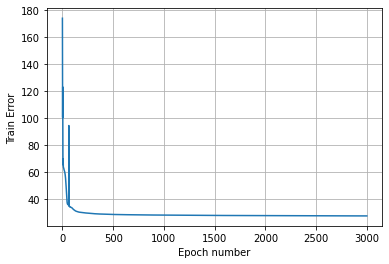

In [9]:
net = nl.net.newff(nl.tool.minmax(df), [30,7]) 

net.layers[-1].transf = nl.trans.LogSig()
net.layers[0].transf = nl.trans.LogSig()
net.layers[1].transf = nl.trans.LogSig()


error = net.trainf = nl.train.train_rprop(net, X_train, y_train, epochs = 3000, show = 100, lr = 0.3, goal = 0.00001)

plt.plot(error)
plt.xlabel('Epoch number')
plt.ylabel('Train Error')
plt.grid()
plt.show();

In [10]:
# Error from last epoch

error[-1]


27.699986754236647

In [11]:
# Error from last epoch

error[-1]

# Network Simulation

out = net.sim(X_test)
out = np.around(out)

# Network Accuracy

correct=(out==y_test).all(axis=1)
acc=(np.sum(correct)/len(out))*100

In [12]:
# Network Accuracy

correct=(out==y_test).all(axis=1)
acc=(np.sum(correct)/len(out))*100

In [13]:
acc

3.076923076923077

In [14]:
np.array_equal(out,y_test)

False

# Step 5

## Present  to  the  trained  neural  network  the  test  set  and  display  the  categorized  patterns  using  the matplotlib library. Compare and comment on your results in relation to the actual class. 

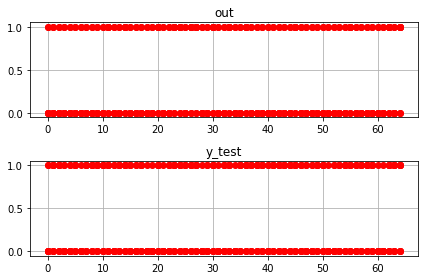

In [15]:
plt.figure(1)
plt.subplot(2,1,1)
plt.plot(out,'ro')
plt.title('out')
plt.grid(True)
        
plt.subplot(2,1,2)
plt.plot(y_test,'ro')
plt.title('y_test')
plt.grid(True)
         
plt.tight_layout()
plt.show()

# Step 6

## Optimize the neural network by adding or subtracting layers / neurons, by changing the number of epochs and record the results in a table for every change you have made. 

In [16]:
# Created a table for my results


data = [[3000, 3, 7, 61.10738255033557,  3.076923076923077],
        [1100, 10,7, 29.015638600532892, 16.923076923076923],
        [2500, 21, 7, 36.16907723550281, 16.923076923076923],
        [500, 30, 7, 50.641818636606175, 21.686083896610874],
        [1400, 50, 7, 13.14839027133521, 9.230769230769232],
        [3000, 100, 7, 4.899277681620157, 3.076923076923077]]

pd.DataFrame(data, columns=["Epochs", "Neurons_of_hidden_layer", "Output_Neurons", "Error_from_last_epoch" ,"Accuracy"])

,Epochs,Neurons_of_hidden_layer,Output_Neurons,Error_from_last_epoch,Accuracy
0,3000,3,7,61.107383,3.076923
1,1100,10,7,29.015639,16.923077
2,2500,21,7,36.169077,16.923077
3,500,30,7,50.641819,21.686084
4,1400,50,7,13.148390,9.230769
5,3000,100,7,4.899278,3.076923


### Best results were those for 30 Neurons and 500 Epochs

# Step 7

## After completing all the steps, repeat the procedure (for the architecture that gave the best results) with split rates (for dataset): 50%-50%, 60%-40%, 80%-20%, 90%-10% and list the results in a table.
###### What do you conclude?  

In [17]:
data = [["50%-50%", 500, 30, 7, 26.137946240129722, 24.299065420560748],
        ["60%-40%", 500, 30, 7, 20.13563761490111, 22.093023255813954],
        ["80%-20%", 500, 30, 7, 74.02923976608187, 9.30232558139535],
        ["90%-10%", 500, 30, 7, 79.8075713961075, 31.818181818181817]]

pd.DataFrame(data, columns=["Split Rate", "Epochs", "Neurons_of_hidden_layer", "Output_Neurons", "Error_from_last_epoch" ,"Accuracy"])


,Split Rate,Epochs,Neurons_of_hidden_layer,Output_Neurons,Error_from_last_epoch,Accuracy
0,50%-50%,500,30,7,26.137946,24.299065
1,60%-40%,500,30,7,20.135638,22.093023
2,80%-20%,500,30,7,74.029240,9.302326
3,90%-10%,500,30,7,79.807571,31.818182


# Step 8

## Create  a  Kohonen  network  and  implement  clustering  to  the  data  (unsupervised  learning).  Use elbow method and silhouette score to determine the number of cluster Apply everything you have learned from the laboratory about Kohonen networks.

In [18]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer



min_max_scaler= preprocessing.MinMaxScaler()

df = min_max_scaler.fit_transform(df)

net = nl.net.newc(nl.tool.minmax(df), 7)
#we choose 3 because we know that there are 7 categories

error =net.trainf=nl.train.train_wta(net, df, epochs =1000, show =200)

Epoch: 200; Error: 142.97888168168984;
Epoch: 400; Error: 142.97888438433642;
Epoch: 600; Error: 142.97888438447188;
Epoch: 800; Error: 142.97888438447188;
Epoch: 1000; Error: 142.97888438447188;
The maximum number of train epochs is reached


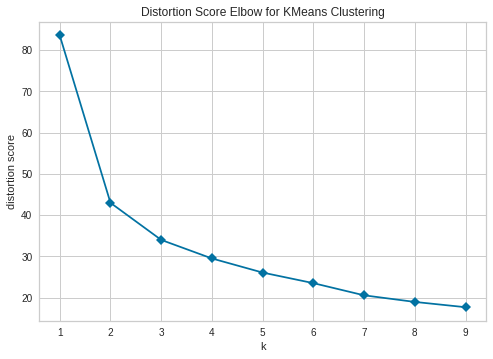

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings=False ,locate_elbow=False)
visualizer.fit(df)       
visualizer.show()        

In [20]:
# Το πρωτο elbow γινεται στον αριθμο 3, οπου σημαινει οτι ο βελτιστος αριθμος clusters ειναι 3.

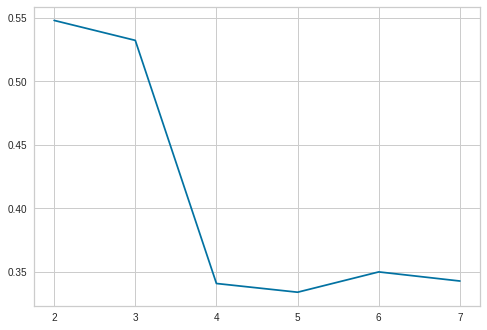

In [21]:
from sklearn.metrics import silhouette_score

sse_ =[]
for k in range(2, 8):
        kmeans =KMeans(n_clusters=k).fit(df)
        sse_.append([k, silhouette_score(df, kmeans.labels_)])

plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [22]:
#Η πρωτη γωνια του παραπανω διαγραμματος αντιστοιχει στον αριθμο 3, οποτε ο βελτιστος αριθμος των cluster ειναι 3.

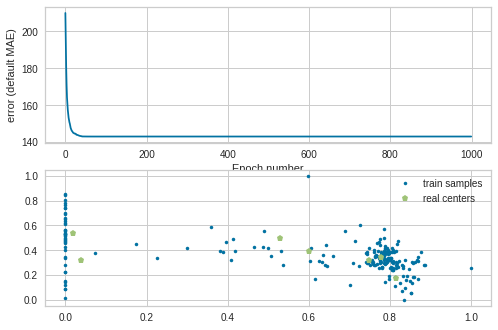

In [23]:
#Plot resuts:

import pylab as pl

plt.title('Classification Problem')
plt.subplot(2,1,1)
plt.plot(error)
plt.xlabel('Epoch number')
plt.ylabel('error (default MAE)')
w = net.layers[0].np['w']

plt.subplot(2,1,2)
plt.plot(df[:,2], df[:,3], '.', \
    w[:,2], w[:,3], 'p')
         
plt.legend(['train samples', 'real centers'])
plt.show();